In [ ]:
import pandas as pd
import glob

# Define the file path pattern to match all JSON files
file_pattern = "/content/*.json"

# Define a dictionary to hold data frames for each class
class_names = ["ss", "sg", "hc", "pc", "else"]
class_dataframes = {class_name: [] for class_name in class_names}

# List all JSON files in the specified directory
json_files = glob.glob(file_pattern)

# Read each JSON file and append it to the appropriate class list
for file in json_files:
    # Extract class name from file name
    class_name = None
    for name in class_names:
        if name in file:
            class_name = name
            break

    if class_name:
        # Read the JSON file into a DataFrame
        df = pd.read_json(file)
        # Append the DataFrame to the corresponding class list
        class_dataframes[class_name].append(df)

# Concatenate DataFrames for each class
for class_name, df_list in class_dataframes.items():
    class_dataframes[class_name] = pd.concat(df_list, ignore_index=True).fillna("something_else")

# Now you have 5 data frames, one for each class
# You can access them like this:
# df_ss = class_dataframes['ss']
# df_sg = class_dataframes['sg']
# df_hc = class_dataframes['hc']
# df_pc = class_dataframes['pc']
# df_else = class_dataframes['else']

# If you want to display the dataframes, you can use:
for class_name, df in class_dataframes.items():
    print(f"{class_name} DataFrame:")
    print(df.head(), "\n")


ss DataFrame:
                        _id                             DOI Publisher  \
0  64e8e72f9214d03ecaea5dea    10.1016/j.apsusc.2019.07.014  Elsevier   
1  64fae320be8f7e712ec243c2    10.1016/j.mtphys.2022.100741  Elsevier   
2  6501ff99d115d9d9047da744  10.1016/j.ceramint.2019.01.159  Elsevier   
3  64f8e224d9b72428dea4f3dd      10.1016/j.jmmm.2008.02.151  Elsevier   
4  65057fc9c069c4d166b9c6be   10.1016/j.jallcom.2010.03.154  Elsevier   

                                              path  \
0               _root$$Experiment and calculations   
1                              _root$$Experimental   
2  _root$$Experimental setup$$Material preparation   
3                              _root$$Experimental   
4                              _root$$Experimental   

                                           ancestors  \
0               [_root, Experiment and calculations]   
1                              [_root, Experimental]   
2  [_root, Experimental setup, Material preparation]  

In [ ]:
for class_name, df_list in class_dataframes.items():
    print(class_name)
    print(class_dataframes[class_name][["classification",	"user_classification",	"user_classification_kc"]])

ss
                   classification                 user_classification  \
0   solid_state_ceramic_synthesis       solid_state_ceramic_synthesis   
1   solid_state_ceramic_synthesis       solid_state_ceramic_synthesis   
2   solid_state_ceramic_synthesis       solid_state_ceramic_synthesis   
3   solid_state_ceramic_synthesis       solid_state_ceramic_synthesis   
4   solid_state_ceramic_synthesis                      something_else   
5   solid_state_ceramic_synthesis       solid_state_ceramic_synthesis   
6   solid_state_ceramic_synthesis                      something_else   
7   solid_state_ceramic_synthesis       solid_state_ceramic_synthesis   
8   solid_state_ceramic_synthesis                      something_else   
9   solid_state_ceramic_synthesis                      something_else   
10  solid_state_ceramic_synthesis       solid_state_ceramic_synthesis   
11  solid_state_ceramic_synthesis                      something_else   
12  solid_state_ceramic_synthesis               

In [ ]:
import pandas as pd

# Assume class_dataframes is a dictionary containing your dataframes
# class_dataframes = {
#     'ss': df_ss,
#     'sg': df_sg,
#     'hc': df_hc,
#     'pc': df_pc,
#     'else': df_else
# }

class_names = ["ss", "sg", "hc", "pc", "else"]

# Initialize an empty list to store the selected columns from each dataframe
selected_columns_dfs = []

# Loop through each class name and select the specified columns
for class_name in class_names:
    selected_columns_dfs.append(class_dataframes[class_name][["classification", "user_classification", "user_classification_kc"]])

# Concatenate all the selected columns dataframes into a single dataframe
final_df = pd.concat(selected_columns_dfs)

# Display the concatenated dataframe
print(final_df)


                   classification            user_classification  \
0   solid_state_ceramic_synthesis  solid_state_ceramic_synthesis   
1   solid_state_ceramic_synthesis  solid_state_ceramic_synthesis   
2   solid_state_ceramic_synthesis  solid_state_ceramic_synthesis   
3   solid_state_ceramic_synthesis  solid_state_ceramic_synthesis   
4   solid_state_ceramic_synthesis                 something_else   
..                            ...                            ...   
45                 something_else                 something_else   
46                 something_else                 something_else   
47                 something_else                 something_else   
48                 something_else                 something_else   
49                 something_else                 something_else   

           user_classification_kc  
0   solid_state_ceramic_synthesis  
1   solid_state_ceramic_synthesis  
2   solid_state_ceramic_synthesis  
3   solid_state_ceramic_synthesis  
4  

In [ ]:
final_df = final_df.iloc[:-20]

In [ ]:
import pandas as pd

def count_matches(df):
    df['match_classification_user'] = df.apply(lambda x: x['classification'] in x['user_classification'], axis=1)
    df['match_classification_user_kc'] = df.apply(lambda x: x['classification'] in x['user_classification_kc'], axis=1)
    df['match_user_user_kc'] = df.apply(lambda x: x['user_classification'] == x['user_classification_kc'], axis=1)

    count_classification_user = df['match_classification_user'].sum()
    count_classification_user_kc = df['match_classification_user_kc'].sum()
    count_user_user_kc = df['match_user_user_kc'].sum()

    result = {
        "count_classification_user": count_classification_user,
        "count_classification_user_kc": count_classification_user_kc,
        "count_user_user_kc": count_user_user_kc
    }
    print("Total: ", len(df['match_classification_user']))
    return result

# Example usage
# df = pd.DataFrame({
#     'classification': ['class1', 'class2', 'class3'],
#     'user_classification': ['class1_example', 'example_class2', 'another_class3'],
#     'user_classification_kc': ['example_class1', 'class2_something', 'class3_more']
# })

# result = count_matches(df)
# print(result)


In [ ]:
for class_name, df_list in class_dataframes.items():
    print(class_name)
    print(count_matches(class_dataframes[class_name]))

ss
Total:  30
{'count_classification_user': 20, 'count_classification_user_kc': 24, 'count_user_user_kc': 23}
sg
Total:  30
{'count_classification_user': 24, 'count_classification_user_kc': 22, 'count_user_user_kc': 21}
hc
Total:  30
{'count_classification_user': 28, 'count_classification_user_kc': 26, 'count_user_user_kc': 23}
pc
Total:  30
{'count_classification_user': 24, 'count_classification_user_kc': 27, 'count_user_user_kc': 24}
else
Total:  50
{'count_classification_user': 50, 'count_classification_user_kc': 49, 'count_user_user_kc': 23}


In [ ]:
classificaiton_names = ["solid_state_ceramic_synthesis", "sol_gel_ceramic_synthesis", "hydrothermal_ceramic_synthesis", "precipitation_ceramic_synthesis", "something_else"]

In [ ]:
def count_matches(df):
    classification_names = ["solid_state_ceramic_synthesis", "sol_gel_ceramic_synthesis", "hydrothermal_ceramic_synthesis", "precipitation_ceramic_synthesis", "something_else"]
    for name in classification_names:
        df["VB_"+name[:10]] = df.apply(lambda x: name in x['user_classification'], axis=1)
        df["KC_"+name[:10]] = df.apply(lambda x: name in x['user_classification_kc'], axis=1)
        df["MatBERT_"+name[:10]] = df.apply(lambda x: name in x['classification'], axis=1)
count_matches(final_df)

In [ ]:
final_df.head()

,classification,user_classification,user_classification_kc,VB_solid_stat,KC_solid_stat,MatBERT_solid_stat,VB_sol_gel_ce,KC_sol_gel_ce,MatBERT_sol_gel_ce,VB_hydrotherm,KC_hydrotherm,MatBERT_hydrotherm,VB_precipitat,KC_precipitat,MatBERT_precipitat,VB_something_,KC_something_,MatBERT_something_
0,solid_state_ceramic_synthesis,solid_state_ceramic_synthesis,solid_state_ceramic_synthesis,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,solid_state_ceramic_synthesis,solid_state_ceramic_synthesis,solid_state_ceramic_synthesis,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,solid_state_ceramic_synthesis,solid_state_ceramic_synthesis,solid_state_ceramic_synthesis,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,solid_state_ceramic_synthesis,solid_state_ceramic_synthesis,solid_state_ceramic_synthesis,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
4,solid_state_ceramic_synthesis,something_else,something_else,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False


In [ ]:
classification_names = ["solid_state_ceramic_synthesis", "sol_gel_ceramic_synthesis", "hydrothermal_ceramic_synthesis", "precipitation_ceramic_synthesis", "something_else"]
names_VB = []
names_KC = []
names_VB.extend(["VB_"+name[:10] for name in classification_names])
names_KC.extend(["KC_"+name[:10] for name in classification_names])
names_VB.extend(["MatBERT_"+name[:10] for name in classification_names])
names_KC.extend(["MatBERT_"+name[:10] for name in classification_names])
names_VB

['VB_solid_stat',
 'VB_sol_gel_ce',
 'VB_hydrotherm',
 'VB_precipitat',
 'VB_something_',
 'MatBERT_solid_stat',
 'MatBERT_sol_gel_ce',
 'MatBERT_hydrotherm',
 'MatBERT_precipitat',
 'MatBERT_something_']

In [ ]:
for name in names:
  print(f"{name}: {final_df[name].sum()}")

VB_solid_stat: 21
VB_sol_gel_ce: 25
VB_hydrotherm: 28
VB_precipitat: 24
VB_something_: 59
KC_solid_stat: 25
KC_sol_gel_ce: 23
KC_hydrotherm: 26
KC_precipitat: 33
KC_something_: 45
MatBERT_solid_stat: 30
MatBERT_sol_gel_ce: 30
MatBERT_hydrotherm: 30
MatBERT_precipitat: 30
MatBERT_something_: 30


In [ ]:
final_df_vb = final_df[names_VB]
final_df_vb.head()

,VB_solid_stat,VB_sol_gel_ce,VB_hydrotherm,VB_precipitat,VB_something_,MatBERT_solid_stat,MatBERT_sol_gel_ce,MatBERT_hydrotherm,MatBERT_precipitat,MatBERT_something_
0,True,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False


Confusion Matrix:
             solid_stat  sol_gel_ce  hydrotherm  precipitat  something_
solid_stat          20           0           1           0           0
sol_gel_ce           0          24           1           0           0
hydrotherm           0           0          26           0           0
precipitat           0           0           0          24           0
something_          10           6           2           6          30


Precision:
             Precision
solid_stat   0.666667
sol_gel_ce   0.800000
hydrotherm   0.866667
precipitat   0.800000
something_   1.000000


Recall:
               Recall
solid_stat  0.952381
sol_gel_ce  0.960000
hydrotherm  1.000000
precipitat  1.000000
something_  0.555556




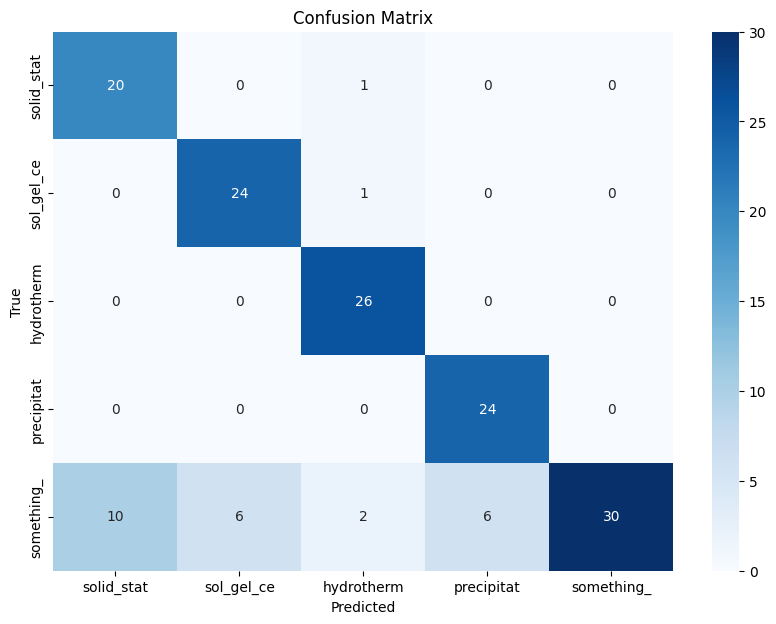

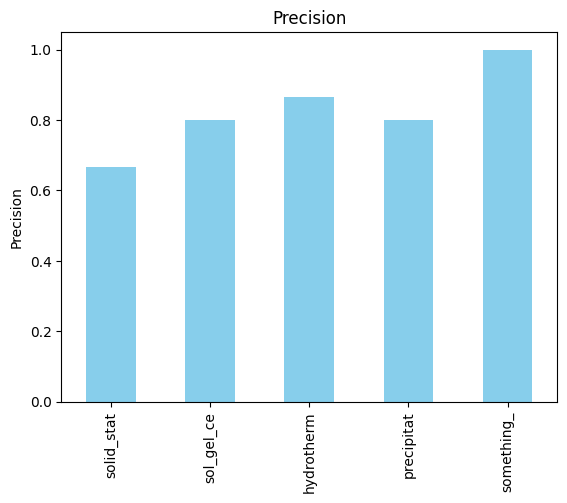

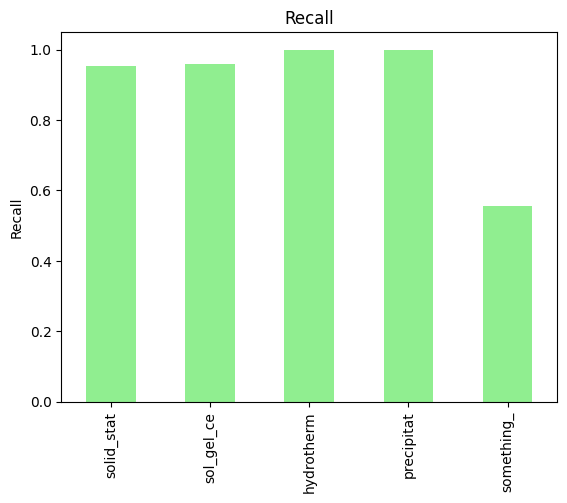

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is already loaded into final_df_vb
# Example:
# final_df_vb = pd.read_csv('your_data.csv')

# List of classes
classes = ["solid_stat", "sol_gel_ce", "hydrotherm", "precipitat", "something_"]

# Flatten the true and predicted labels
true_labels = final_df_vb[[f'VB_{cls}' for cls in classes]].values.argmax(axis=1)
pred_labels = final_df_vb[[f'MatBERT_{cls}' for cls in classes]].values.argmax(axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels, labels=range(len(classes)))

# Calculate precision and recall
precision = precision_score(true_labels, pred_labels, average=None, labels=range(len(classes)))
recall = recall_score(true_labels, pred_labels, average=None, labels=range(len(classes)))

# Display results as DataFrames
conf_matrix_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)
precision_df = pd.DataFrame(precision, index=classes, columns=["Precision"])
recall_df = pd.DataFrame(recall, index=classes, columns=["Recall"])

# Function to display DataFrames nicely in Google Colab
def display_dataframe(name, dataframe):
    print(f"{name}:\n", dataframe)
    print("\n")

display_dataframe("Confusion Matrix", conf_matrix_df)
display_dataframe("Precision", precision_df)
display_dataframe("Recall", recall_df)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Displaying precision and recall as bar plots
precision_df.plot(kind='bar', legend=False, color='skyblue', title='Precision')
plt.ylabel('Precision')
plt.show()

recall_df.plot(kind='bar', legend=False, color='lightgreen', title='Recall')
plt.ylabel('Recall')
plt.show()


In [ ]:
precision_df.values.mean()

0.8466666666666667

In [ ]:
recall_df.values.mean()

0.8764879142596534

In [ ]:
final_df_kc = final_df[names_KC]

Confusion Matrix:
             solid_stat  sol_gel_ce  hydrotherm  precipitat  something_
solid_stat          24           0           1           1           0
sol_gel_ce           1          22           0           0           0
hydrotherm           0           0          25           0           0
precipitat           0           1           3          27           1
something_           5           7           1           2          29


Precision:
             Precision
solid_stat   0.800000
sol_gel_ce   0.733333
hydrotherm   0.833333
precipitat   0.900000
something_   0.966667


Recall:
               Recall
solid_stat  0.923077
sol_gel_ce  0.956522
hydrotherm  1.000000
precipitat  0.843750
something_  0.659091




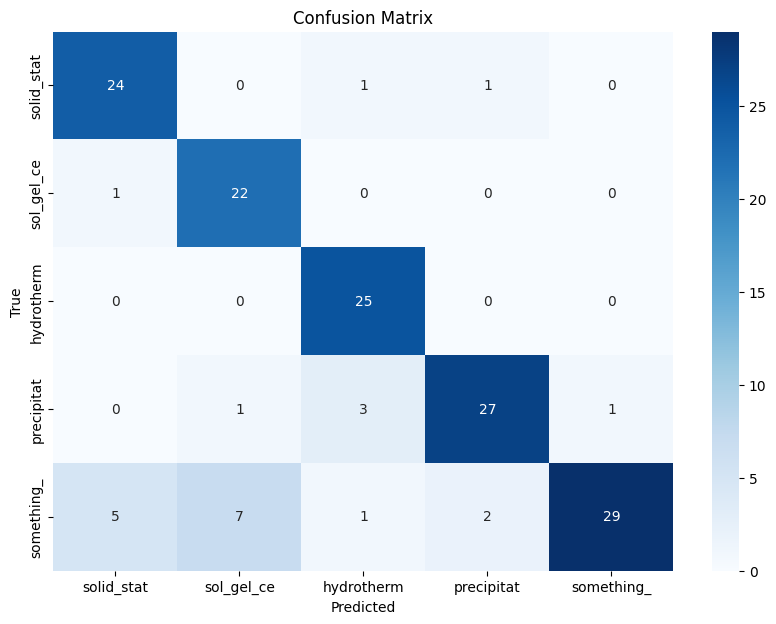

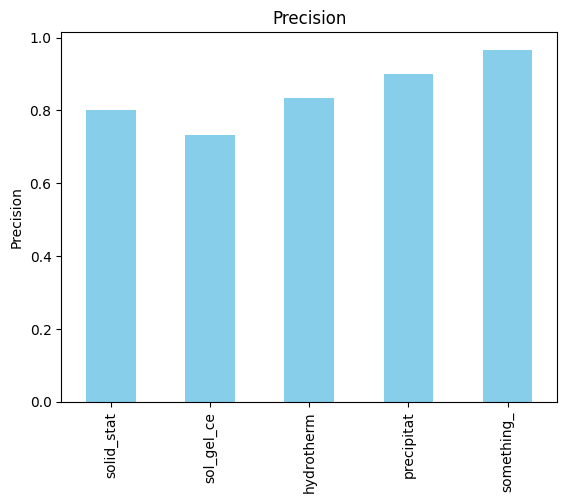

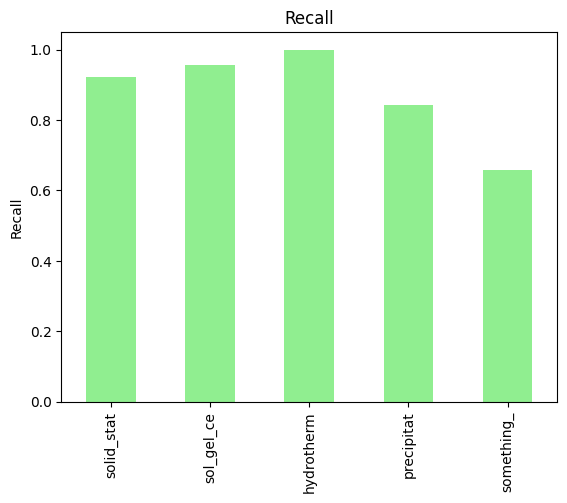

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is already loaded into final_df_vb
# Example:
# final_df_vb = pd.read_csv('your_data.csv')

# List of classes
classes = ["solid_stat", "sol_gel_ce", "hydrotherm", "precipitat", "something_"]

# Flatten the true and predicted labels
true_labels = final_df_kc[[f'KC_{cls}' for cls in classes]].values.argmax(axis=1)
pred_labels = final_df_kc[[f'MatBERT_{cls}' for cls in classes]].values.argmax(axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels, labels=range(len(classes)))

# Calculate precision and recall
precision = precision_score(true_labels, pred_labels, average=None, labels=range(len(classes)))
recall = recall_score(true_labels, pred_labels, average=None, labels=range(len(classes)))

# Display results as DataFrames
conf_matrix_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)
precision_df = pd.DataFrame(precision, index=classes, columns=["Precision"])
recall_df = pd.DataFrame(recall, index=classes, columns=["Recall"])

# Function to display DataFrames nicely in Google Colab
def display_dataframe(name, dataframe):
    print(f"{name}:\n", dataframe)
    print("\n")

display_dataframe("Confusion Matrix", conf_matrix_df)
display_dataframe("Precision", precision_df)
display_dataframe("Recall", recall_df)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Displaying precision and recall as bar plots
precision_df.plot(kind='bar', legend=False, color='skyblue', title='Precision')
plt.ylabel('Precision')
plt.show()

recall_df.plot(kind='bar', legend=False, color='lightgreen', title='Recall')
plt.ylabel('Recall')
plt.show()
